In [1]:
%load_ext lab_black
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings

warnings.filterwarnings("ignore")
pd.plotting.register_matplotlib_converters()

In [3]:
figsize = (15, 10)
covid_url = (
    "https://www.data.gouv.fr/fr/datasets/r/63352e38-d353-4b54-bfd1-f1b3ee1cabd7"
)
nb_filter = 10  # Number of departments with highest number of hospitalizations

#### <br> Load COVID-19 data

In [4]:
df = pd.read_csv(covid_url, sep=";", parse_dates=True, index_col=2)
df = df.query("sexe == 0")  # sum male/female
df.drop(columns=["sexe"], inplace=True)
df.sort_index(inplace=True)
df.rename(
    columns={
        "hosp": "Number of people hospitalized",
        "rea": "Number of people in resuscitation or critical care",
        "rad": "Total amount of patients that returned home",
        "dc": "Total amount of deaths",
    },
    inplace=True,
)
df.head(2)

,dep,Number of people hospitalized,Number of people in resuscitation or critical care,Total amount of patients that returned home,Total amount of deaths
jour,,,,,
2020-03-18,01,2,0,1,0
2020-03-18,02,41,10,18,11


#### <br> Filter the departments with highest hospitalizations

In [5]:
last_day = df.index.max()
last_df = df.loc[last_day]
last_df.reset_index(inplace=True)
filter = last_df.sort_values(by="Number of people hospitalized", ascending=False).head(
    nb_filter
)
filter_dep = filter.dep.unique()
filter_dep

array(['75', '94', '92', '93', '69', '91', '13', '57', '67', '78'],
      dtype=object)

In [6]:
tdf = df.query("dep in @filter_dep")
tdf = tdf[["dep", "Number of people hospitalized"]]
tdf.head()

,dep,Number of people hospitalized
jour,,
2020-03-18,13,98
2020-03-18,57,169
2020-03-18,67,210
2020-03-18,69,36
2020-03-18,75,359


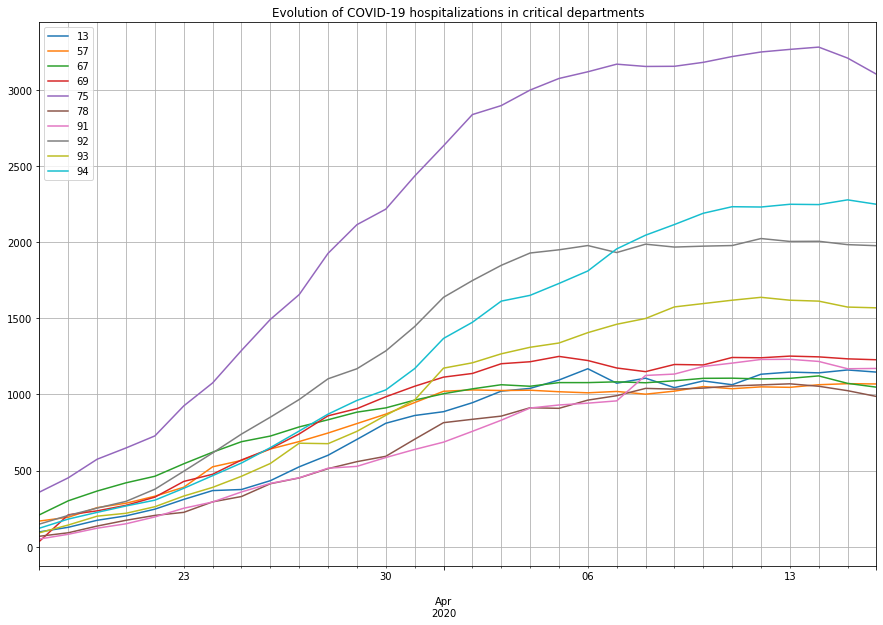

In [7]:
f, ax = plt.subplots(figsize=figsize)
dep_list = []
for dep in tdf.dep.unique():
    dep_list.append(dep)
    stdf = tdf.query("dep==@dep")
    if stdf.shape[0] > 0:
        stdf.plot(ax=ax, subplots=False, sharex=True, grid=True)
    # stdf.plot(ax=ax)
ax.legend(dep_list)
ax.grid(True, which="both")
ax.set_title("Evolution of COVID-19 hospitalizations in critical departments")
img_name = "top10.png"
ax.xaxis.set_label_text("")
f.savefig(img_name)